In [1]:
import os
import pickle
import numpy as np

from algos import *
from infect import infect
from sbm import SBM

In [2]:
def iter(N,M,q0,q1,p0,p1,time_steps,num_sims,method,dataset='sbm'):

    name = dataset+'N'+str(N)+'_M'+str(M)+'_SIM'+str(num_sims)+'_step'+str(time_steps)+'_q0'+str(q0)+'_q1'+str(q1)+'_p0'+str(p0)+'_p1'+str(p1)+method+'graphs.pkl'
    if not os.path.isfile(name):
        print('Generating synthetic dataset!')
        Gs = np.zeros((num_sims,N,N))
        Communities = dict()
        data = dict()
        Individuals = dict()
        if dataset=='sbm':
            for i in range(num_sims):
                Gs[i] = SBM(N,M,q0,q1)
                ###################################################
                '''your code here'''
                communities = []
                ###################################################
                Communities[i] = communities
                Individuals[i] = infect(Gs[i],p0,p1,time_steps)
        elif dataset=='iid':
            for i in range(num_sims):
                ###################################################
                '''your code here'''
                # Individuals[i] = 
                # Communities[i] =[[all individuals]]
                ###################################################
        data['graph'] = Gs
        data['communities'] = Communities
        data['individuals'] = Individuals
        with open(name, 'wb') as infile:
            pickle.dump(data,infile) 
    #         print('Dataset done!')


    ###################################################
    '''your code for initialization parameters if needed''' 
    fraction_ppl = 0
    fraction_family = 0
    fraction_ppl_in_family = 0
    #num_tests = 
    #num_stages = 
    ###################################################
        
    if os.path.isfile(name):
        with open(name, 'rb') as infile:
            data = pickle.load(infile) 
        print('Data loaded!')
    for i in range(num_sims):
        if dataset=='synthetic':
            G = data['graph'][i]
            communities = data['communities'][i]
            individuals = data['individuals'][i]
        ###################################################
        '''your code to calculate the statistics here''' 

        
        ###################################################

        # interleave the individuals
        s = individuals.copy()
        np.random.shuffle(s)
        # binary
        numtests_bs, num_stages_bs, _ = binary_splitting(s)
        # algorithm 1
        numtests_q1, num_stages_q1 = Qtesting1(s)
        # algorithm 2
        numtests_q2, num_stages_q2 = Qtesting2(s)
        # community-aware
        numtests_q1_c, num_stages_q1_c = Qtesting1_comm_aware(individuals.copy(),communities)
        # community-aware
        numtests_q2_c, num_stages_q2_c = Qtesting2_comm_aware(individuals.copy(),communities)

    ###################################################
    '''your code to calculate the statistics here''' 
    '''Do not forget to take the average'''

    ###################################################
            

    return fraction_ppl, fraction_family, fraction_ppl_in_family, num_tests, num_stages

<div class="alert alert-warning">
<b>Task 1 </b> 
Plot how the fraction of infected people, the percentage of infected communities, and the average percentage of infected people in each community change with the each setting for the synthetic dataset described in the following table and comment on the results. Average over at least $100$ SBM network realization.     

</div>

| N | M | q0, q1 | p0 | p1 |time steps  |
|---|---|--------|----|----|------------|
|256| 16| (1,0)  |0.001|[0.05:1]|2|
|   | 16|(0.9, 0.1)  | 0.001| [0.05:1]|2     |
|   | 16 |(0.5, 0.2)  | 0.001| [0.05:1]|2     |

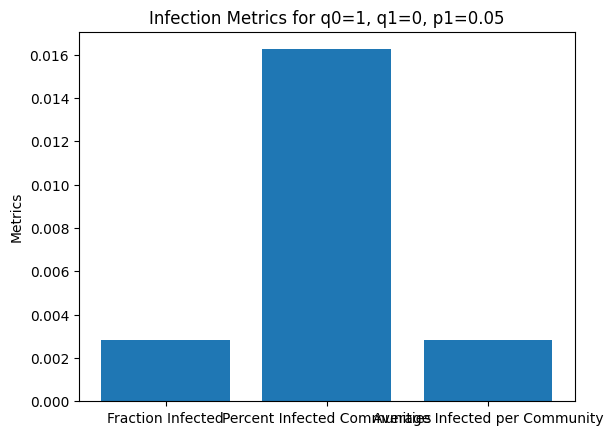

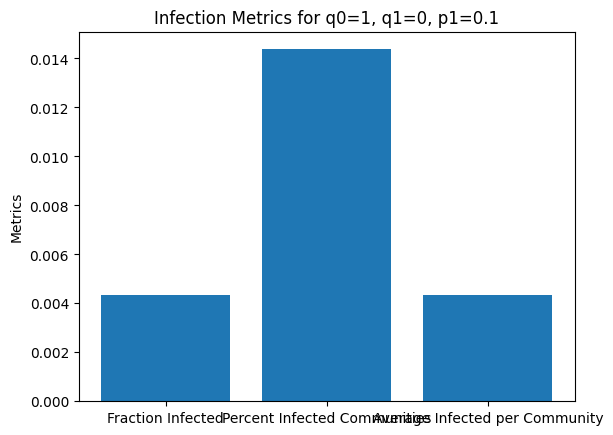

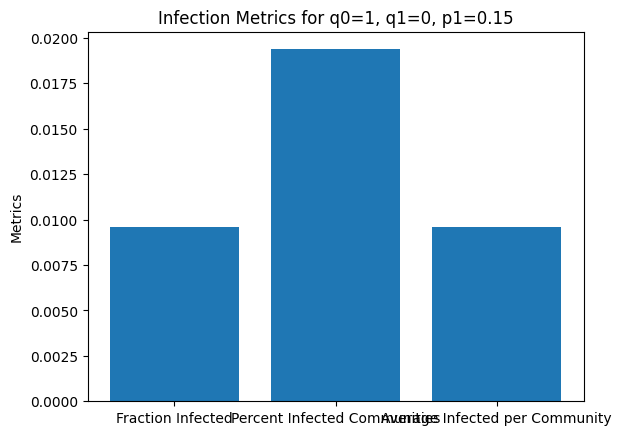

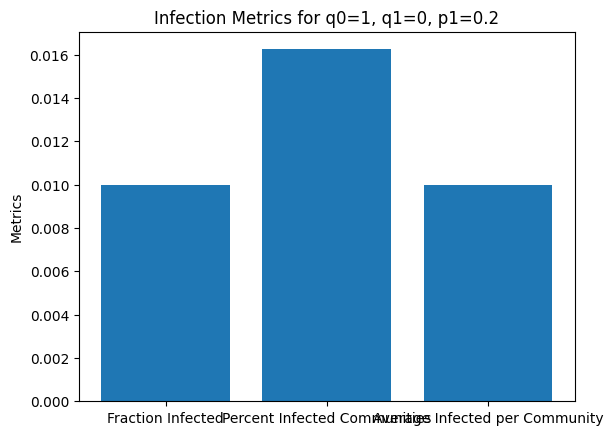

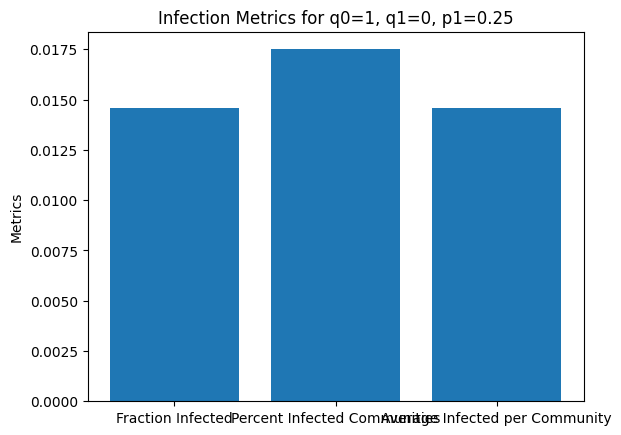

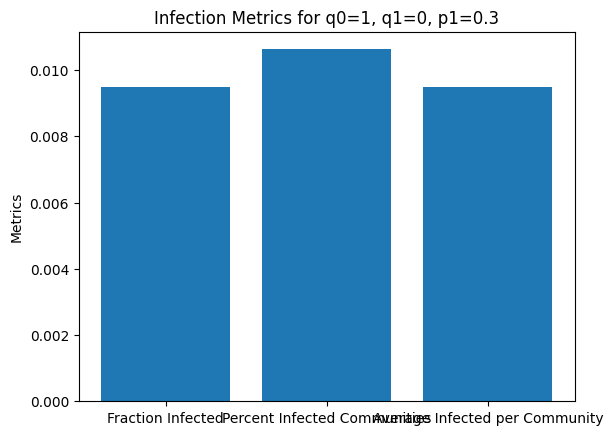

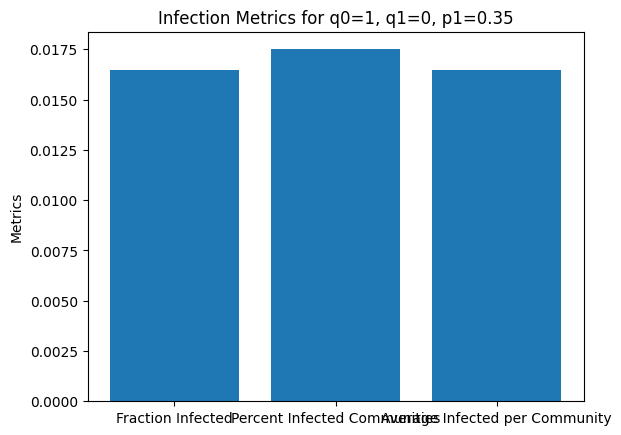

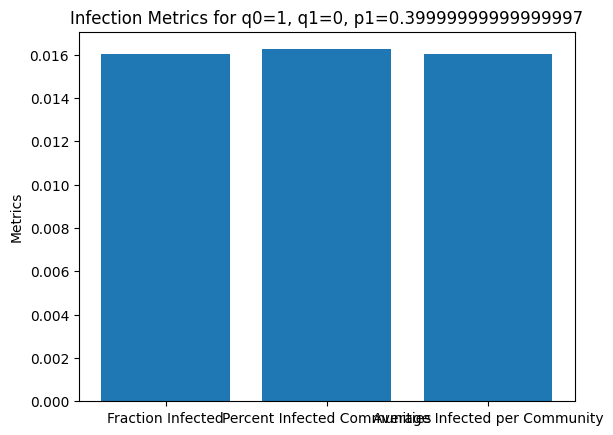

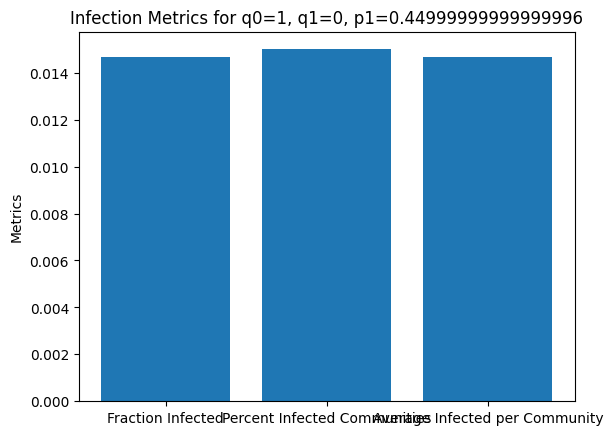

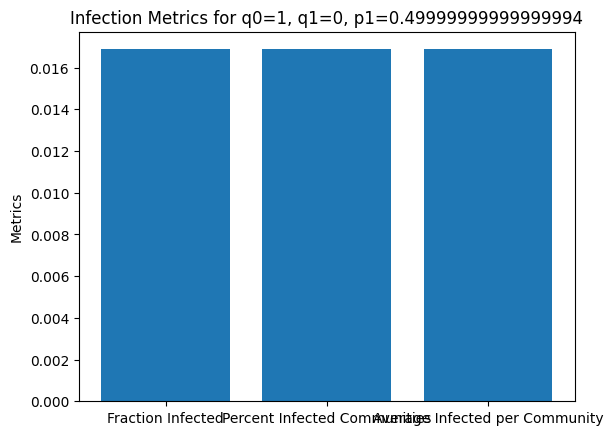

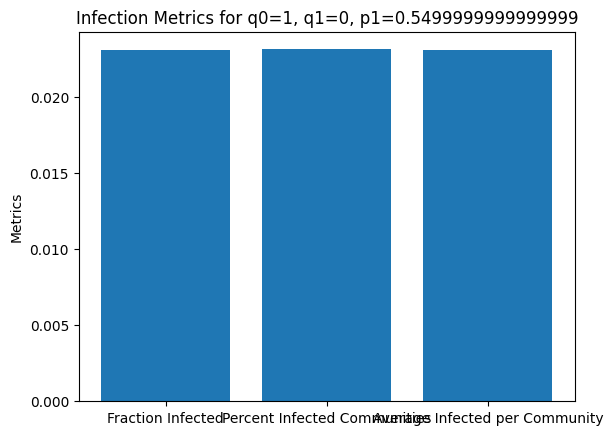

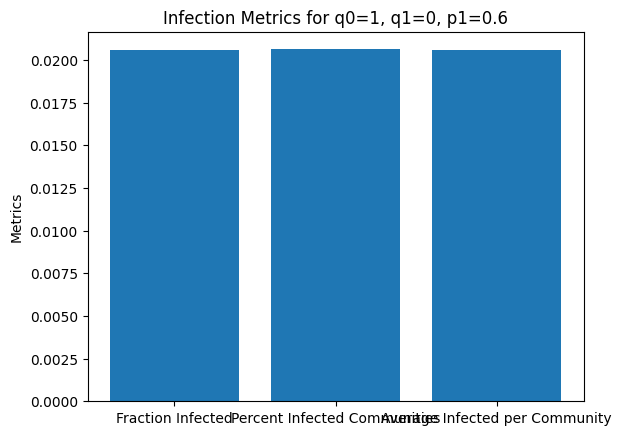

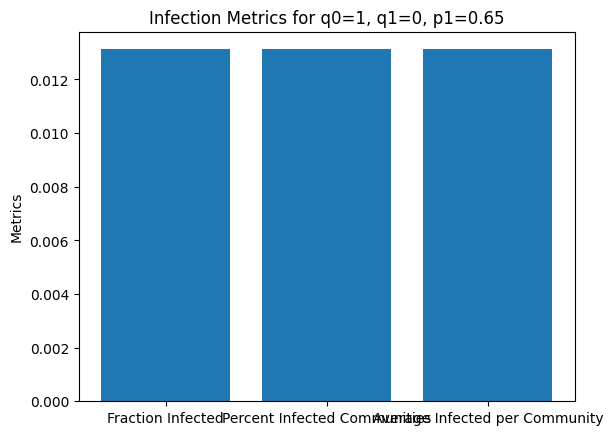

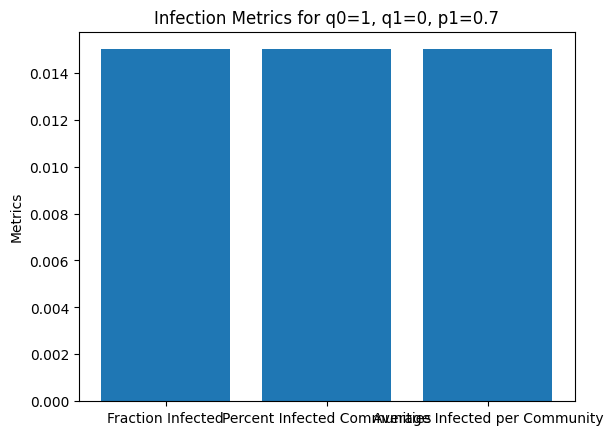

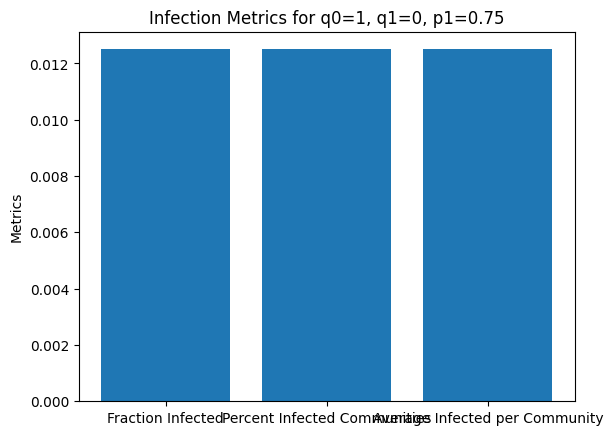

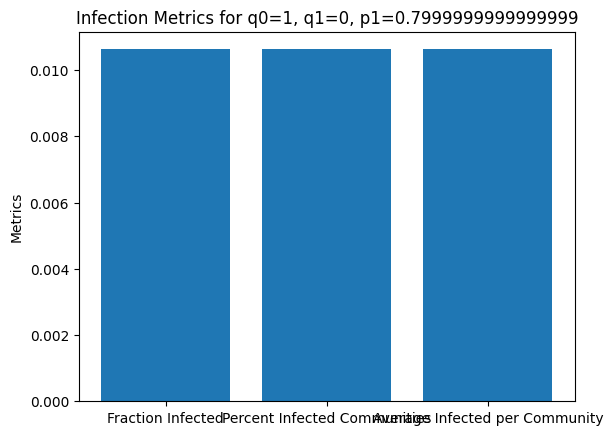

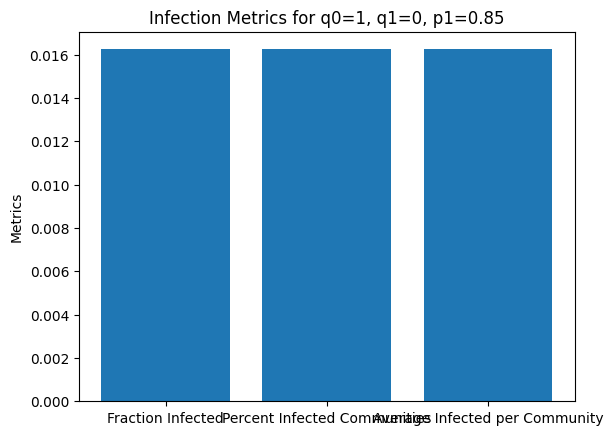

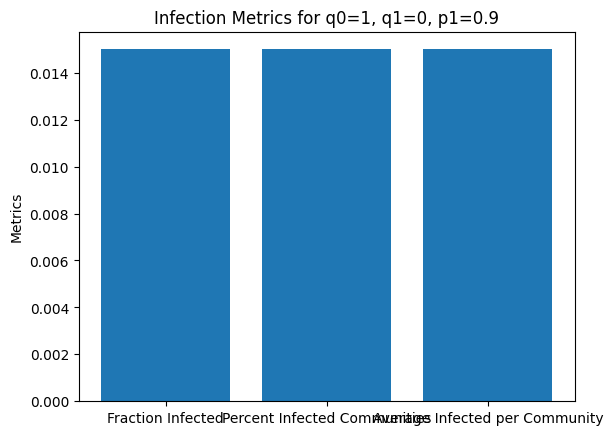

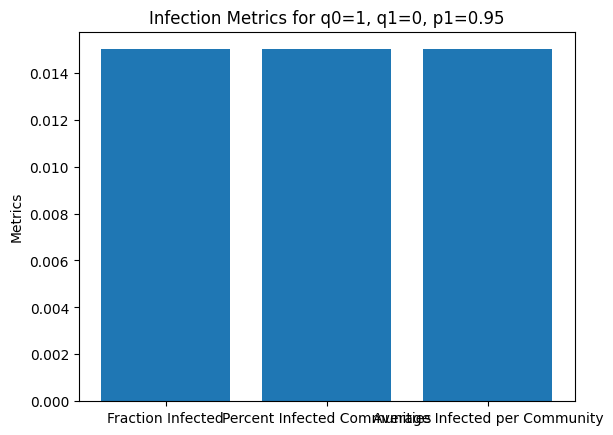

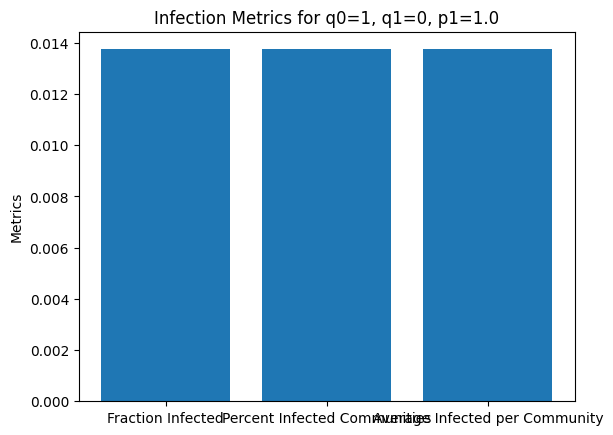

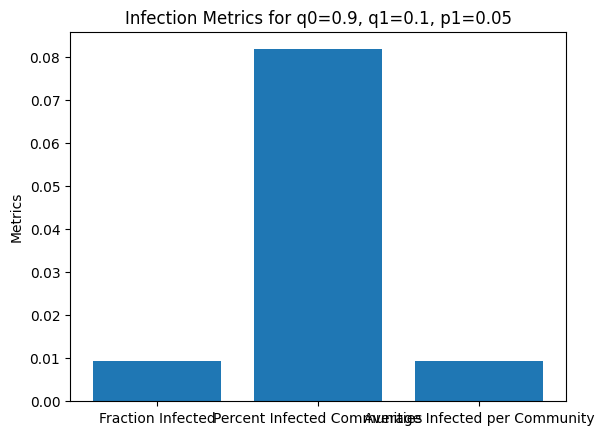

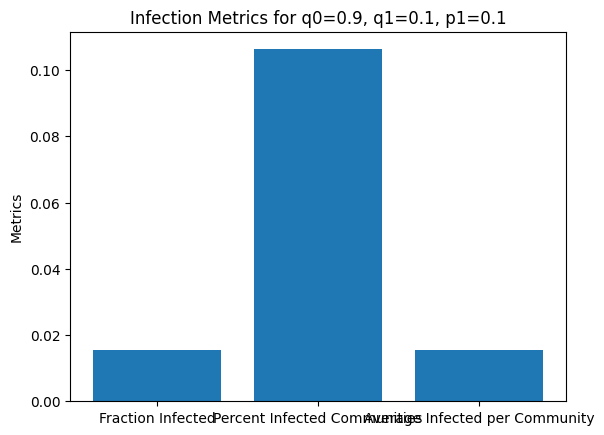

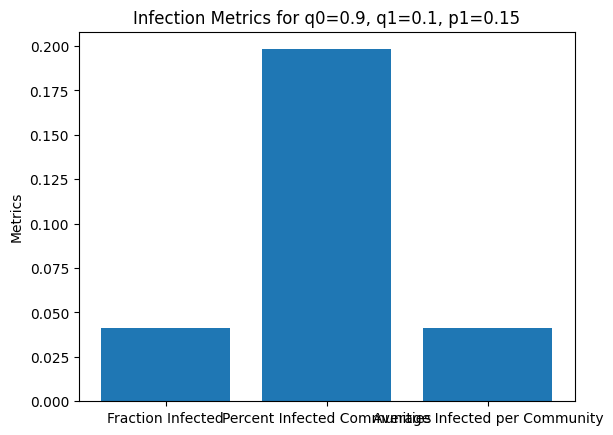

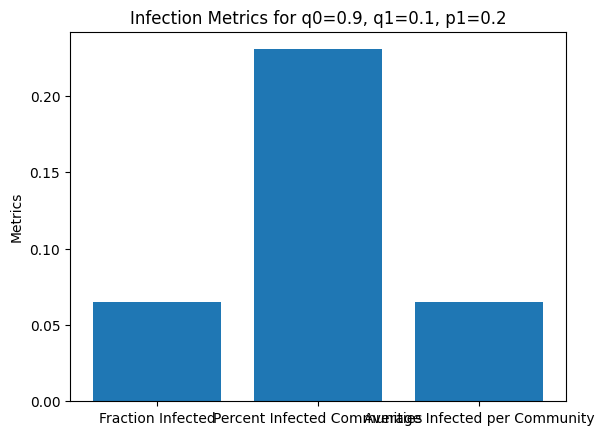

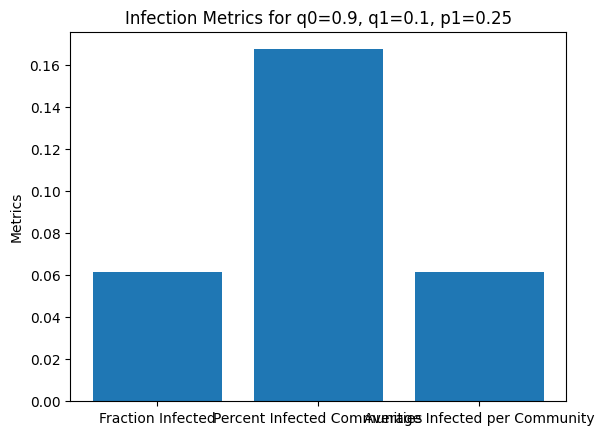

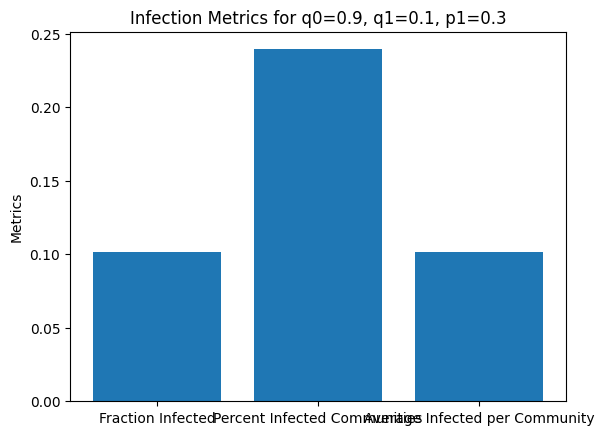

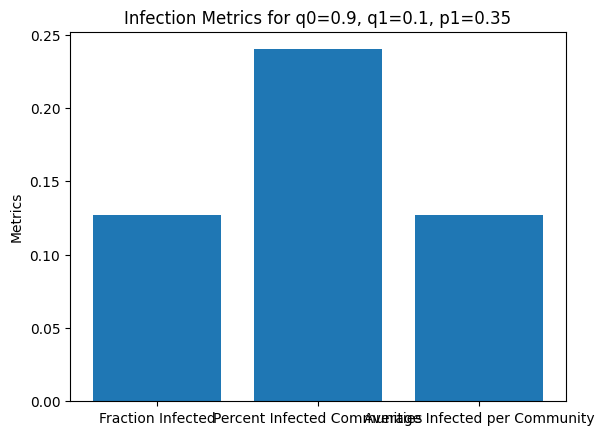

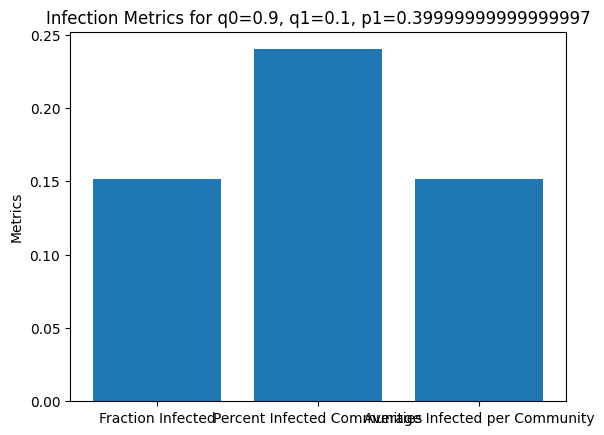

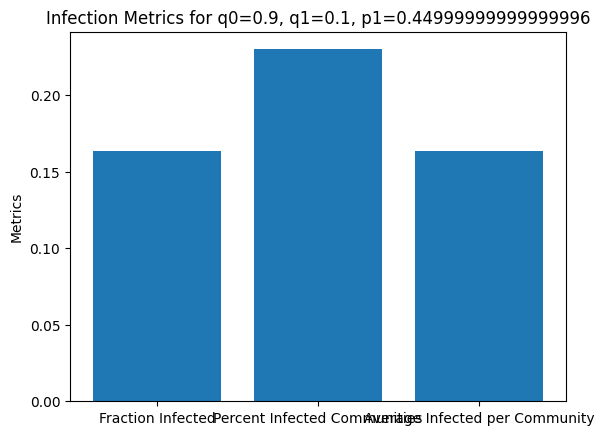

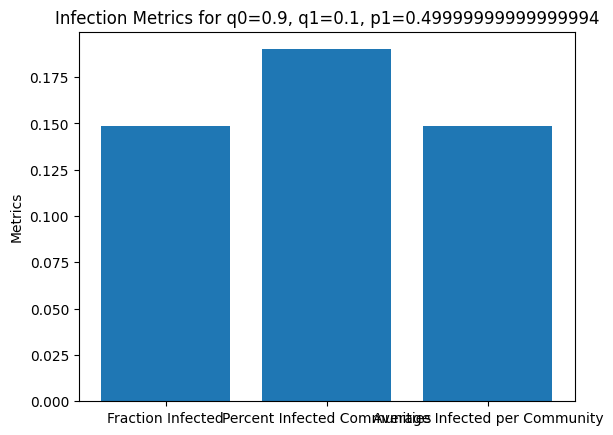

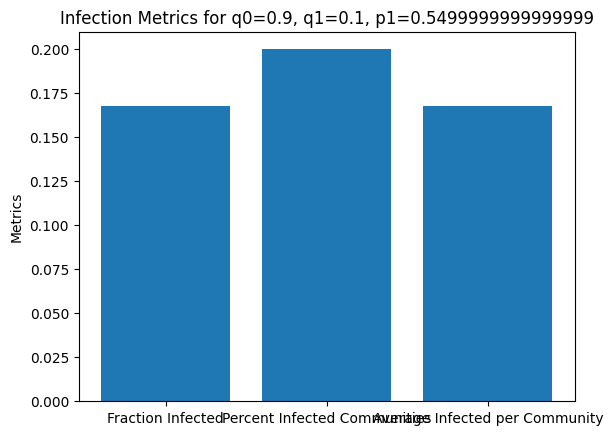

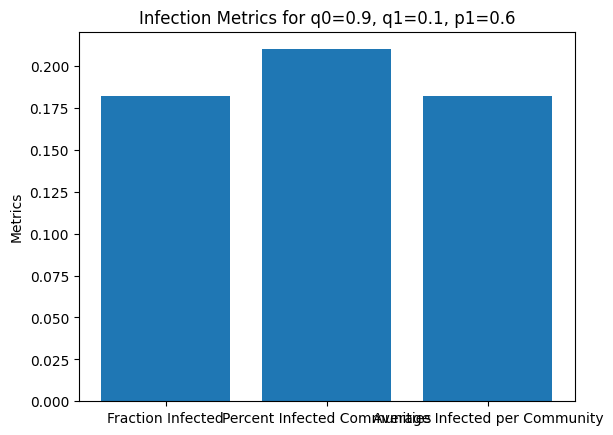

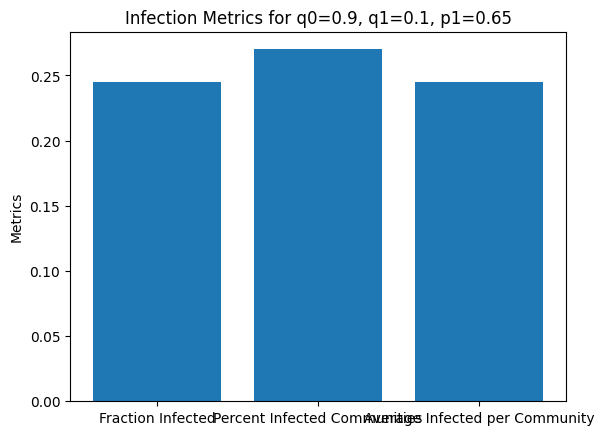

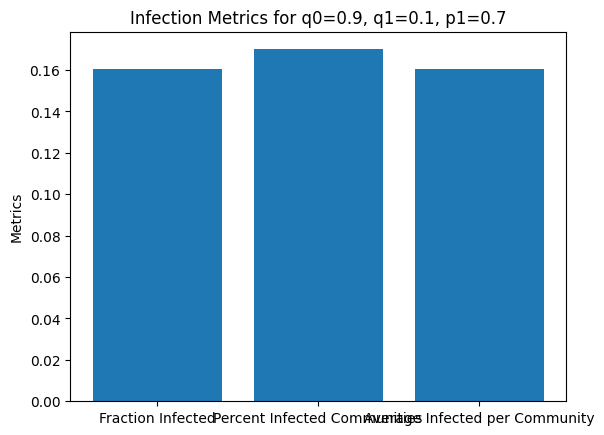

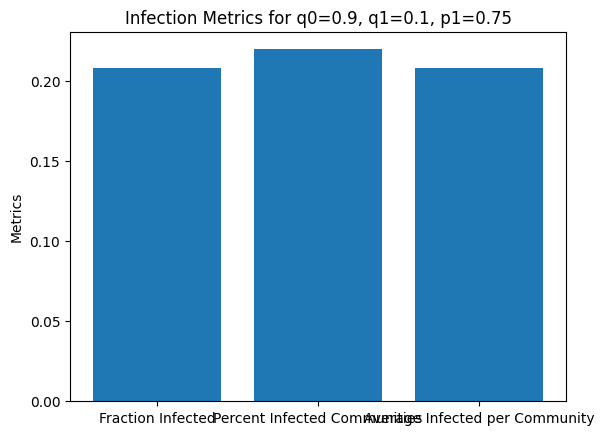

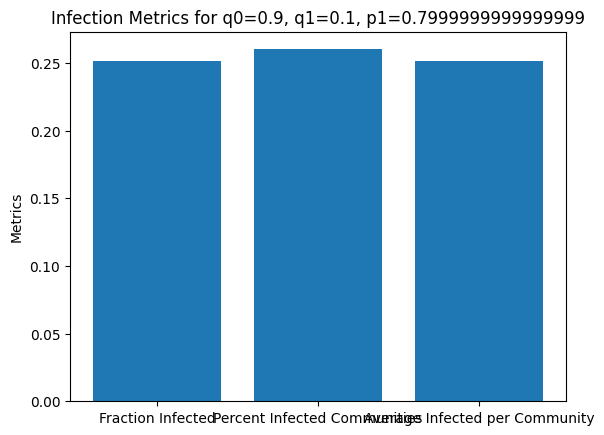

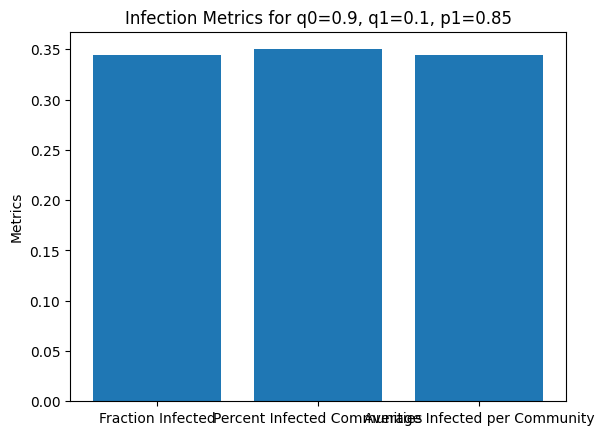

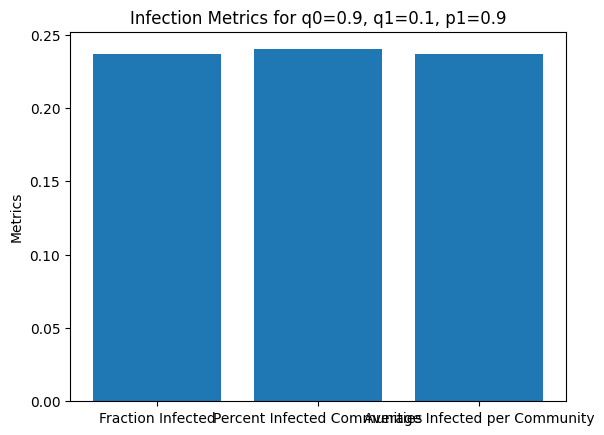

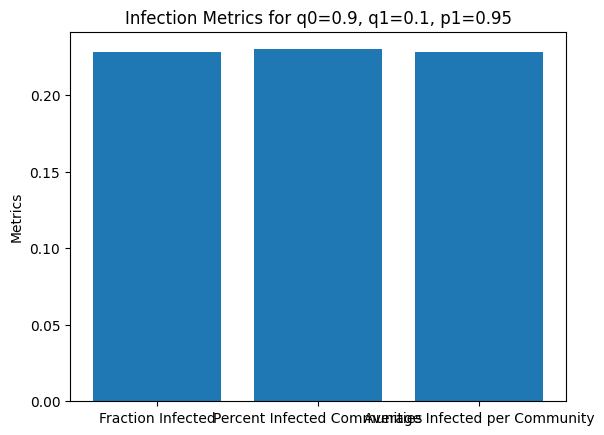

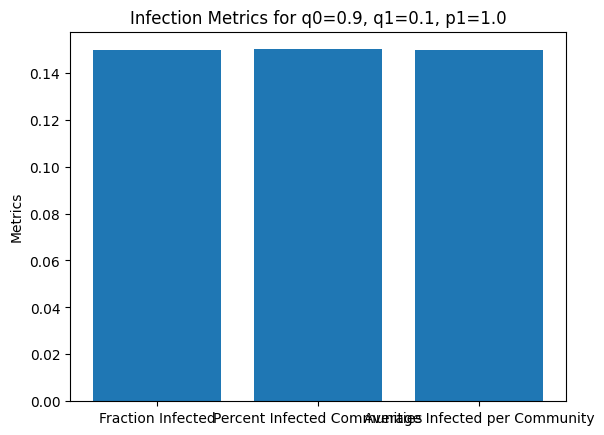

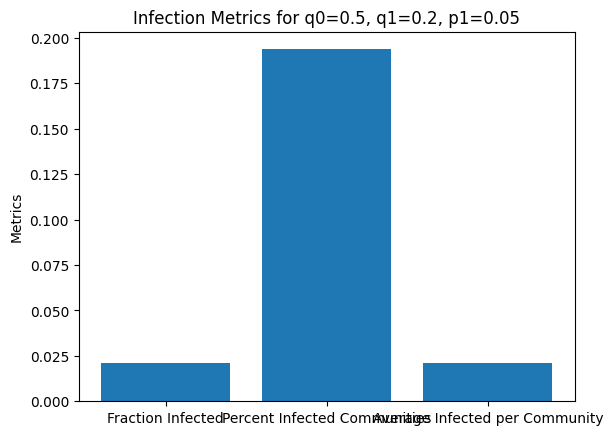

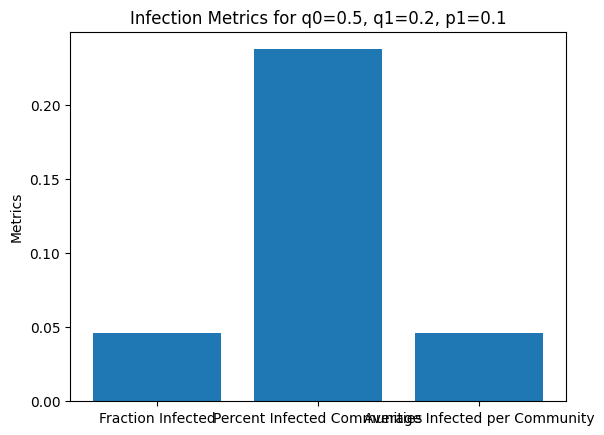

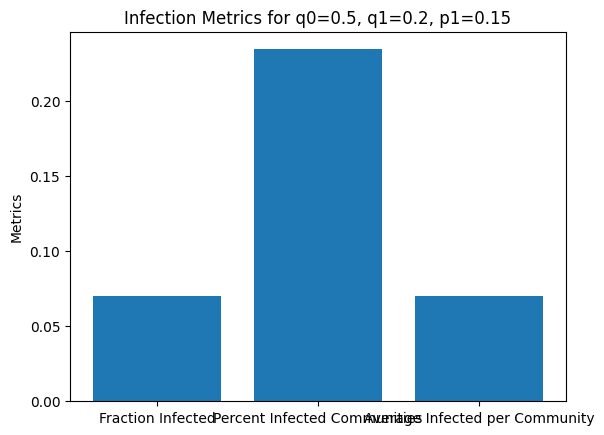

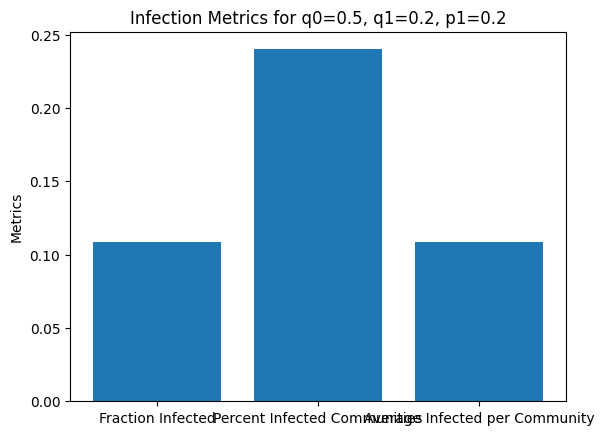

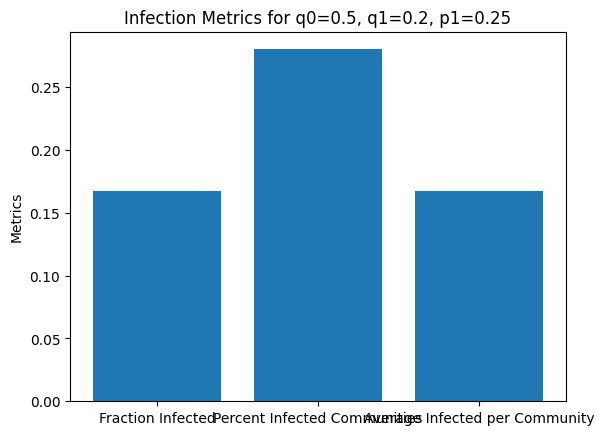

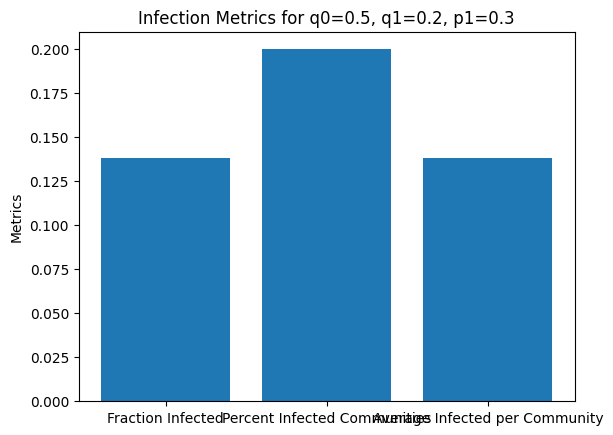

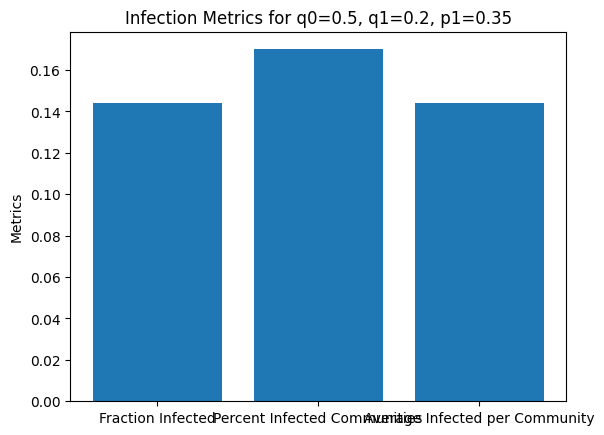

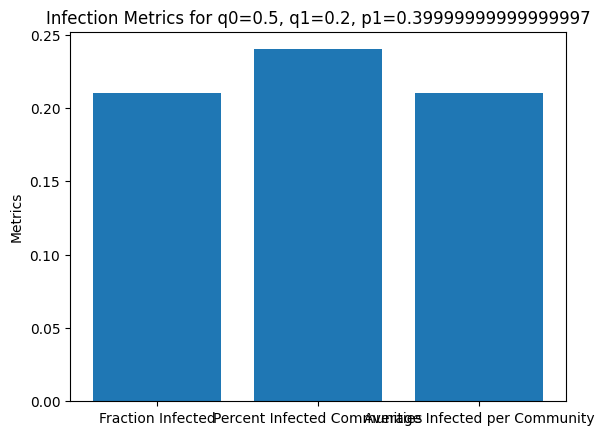

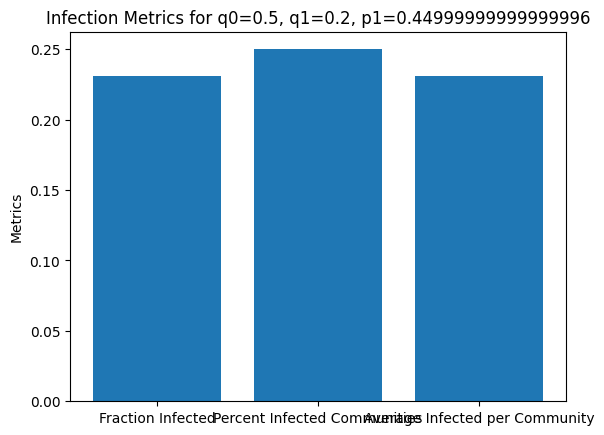

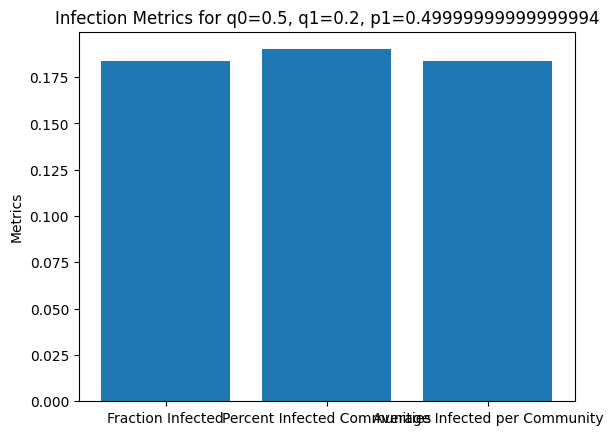

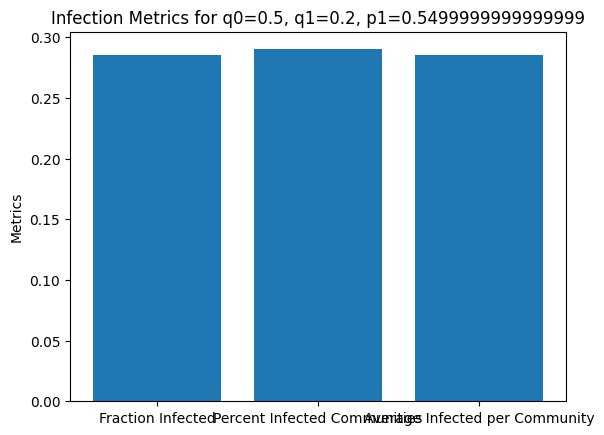

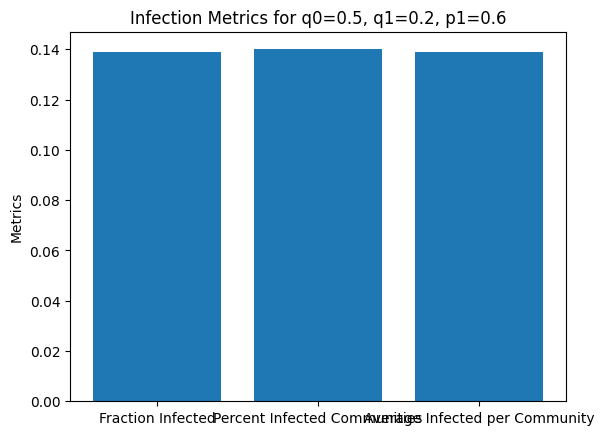

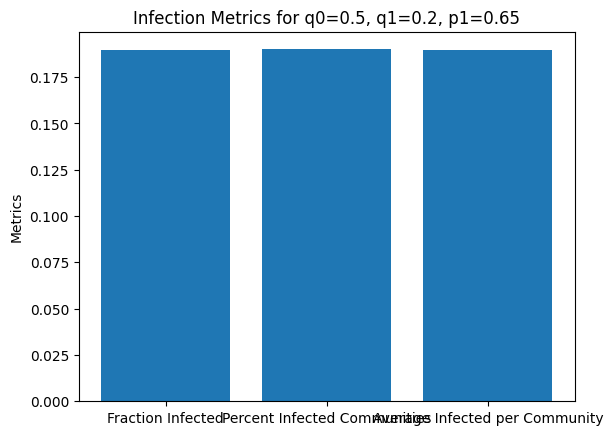

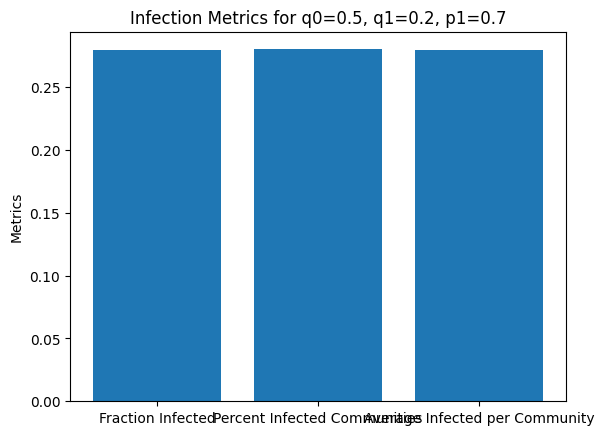

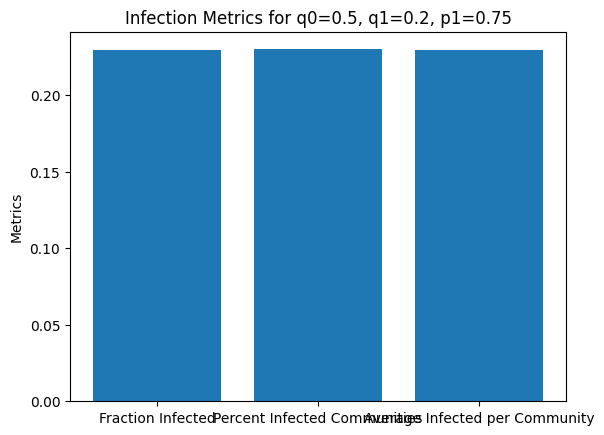

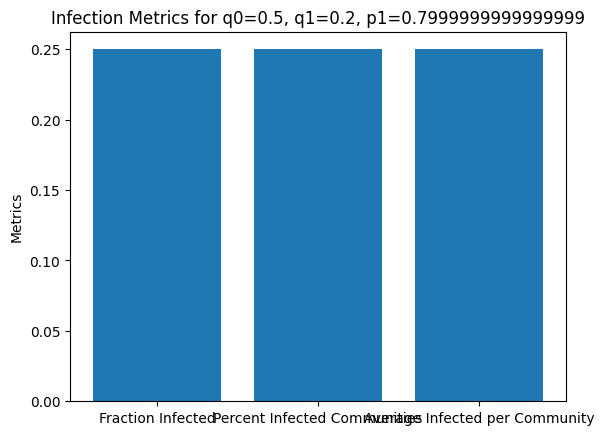

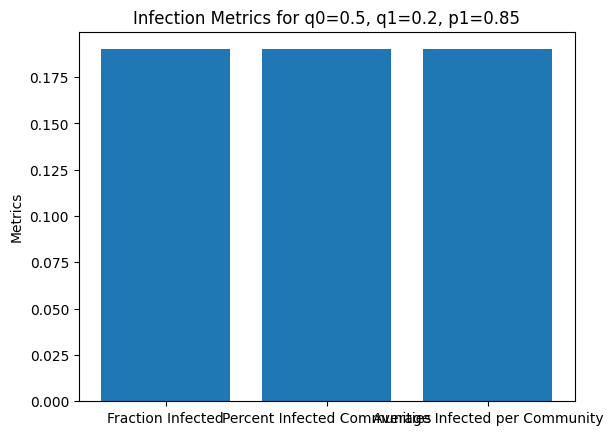

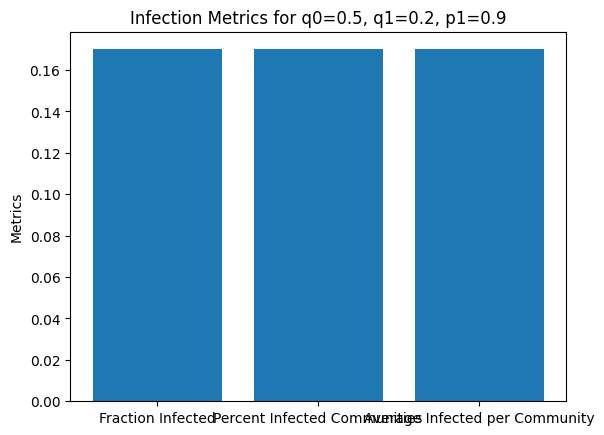

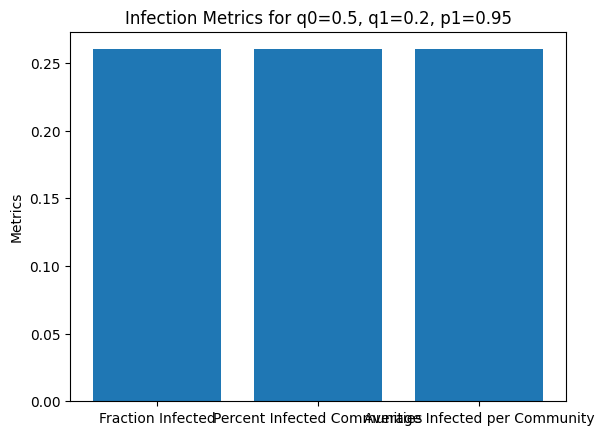

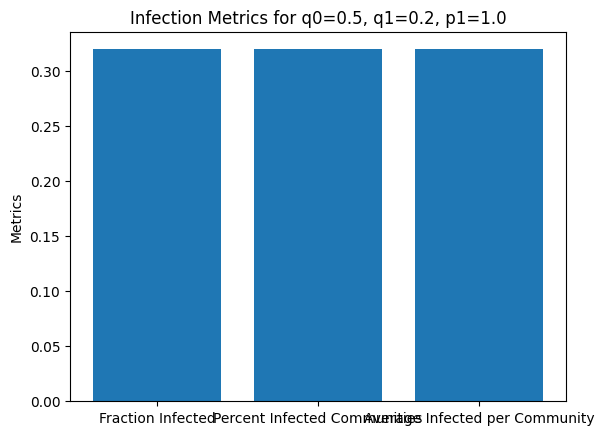

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_infections(N, M, q0, q1, p0, p1_values, time_steps, realizations):
    results = []
    for p1 in p1_values:
        fraction_infected = []
        percent_infected_communities = []
        avg_infected_per_community = []

        for _ in range(realizations):
            G = SBM(N, M, q0, q1)
            initial_infection = infect(G, p0, p1, time_steps)

            total_infected = np.sum(initial_infection)
            fraction_infected.append(total_infected / N)
            
            community_sizes = [N // M] * M
            for i in range(N % M):
                community_sizes[i] += 1

            start = 0
            infected_communities = 0
            community_infections = []

            for size in community_sizes:
                end = start + size
                community_infected = np.sum(initial_infection[start:end])
                if community_infected > 0:
                    infected_communities += 1
                community_infections.append(community_infected / size)
                start = end

            percent_infected_communities.append(infected_communities / M)
            avg_infected_per_community.append(np.mean(community_infections))
        
        results.append((np.mean(fraction_infected), np.mean(percent_infected_communities), np.mean(avg_infected_per_community)))

    return results

# Parameters
N = 256
M = 16
q0_q1_pairs = [(1, 0), (0.9, 0.1), (0.5, 0.2)]
p0 = 0.001
p1_values = np.linspace(0.05, 1, 20)  # From 0.05 to 1, evenly spaced 20 values
time_steps = 2
realizations = 100

# Run simulations for each q0, q1 configuration
for q0, q1 in q0_q1_pairs:
    results = simulate_infections(N, M, q0, q1, p0, p1_values, time_steps, realizations)
    
    # Plotting results for each configuration
    for i, (fraction, percent_communities, avg_community) in enumerate(results):
        labels = ['Fraction Infected', 'Percent Infected Communities', 'Average Infected per Community']
        plt.figure()
        plt.bar(labels, [fraction, percent_communities, avg_community])
        plt.ylabel('Metrics')
        plt.title(f'Infection Metrics for q0={q0}, q1={q1}, p1={p1_values[i]}')
        plt.show()

In [5]:
print("Results:", results)


Results: (0.0044921875, 0.011875, 0.0044921875)


In [6]:
import numpy as np

def simulate_metrics(G, infected_status):
    N = len(infected_status)
    total_infected = np.sum(infected_status)
    fraction_infected = total_infected / N  # Total fraction of infected individuals

    # Assuming community assignments are known
    community_assignments = np.random.randint(0, M, size=N)  # Example: Random assignment to M communities
    community_infected = np.zeros(M)
    community_sizes = np.zeros(M)

    for i in range(N):
        community = community_assignments[i]
        community_sizes[community] += 1
        if infected_status[i] == 1:
            community_infected[community] += 1

    average_infected_per_community = np.mean(community_infected / community_sizes)

    return fraction_infected, average_infected_per_community

# Example use
N = 100
M = 4  # Number of communities
infected_status = np.random.randint(0, 2, size=N)  # Random infection status
G = np.zeros((N, N))  # Placeholder for the actual adjacency matrix

results = simulate_metrics(G, infected_status)
print("Fraction Infected:", results[0])
print("Average Infected per Community:", results[1])

Fraction Infected: 0.39
Average Infected per Community: 0.38031533683707597


Consider $N=256$, and $M=16,64,128$. Use SBM with $q0=1$ and $q1=0$ to generate contact networks (disconnected cliques). For the infection model, use $p_0 = 0.001$ and $p_1 = [0.01:1]$ and the number of infection steps as $2$ . 
Average over 100 SBM network realizations.

<div class="alert alert-warning">
<b>Task 2 </b> 
Provide plots for i.i.d. infection probability that ranges from $p=0.01$ to $p=0.3$, and $N=256$.
Compare the performance of tests $T_1$, $T_2$, and binary output tests. Do you observe a consistent performance? Can you explain your results? 
    
</div>

<div class="alert alert-warning">
<b>Task 3 </b>  
Provide plots that compare the performance of various testing techniques on the Stochastic Block Model (SBM) using the settings outlined in Table 2 and on real data. You may explore additional settings that could reveal significant insights for your custom algorithms. Interpret and explain the results you obtain. Your plots should include: (i) a plot demonstrating how the performance of different testing schemes varies as the family sizes change, (ii)a plot demonstrating how the performance of different testing schemes varies as the infection probability changes and (iii) a plot illustrating how infections concentrate within families in the SBM.
</div>

| N | M | q0, q1 | p0 | p1 |time steps  |
|---|---|--------|----|----|------------|
|256| 16| (0.9,0.1)  |0.001|[0.05:1]|2|
|   | 64|(1, 0)  | 0.001| [0.05:1]|2     |
|   | 64|(0.9, 0.1)  | 0.001| [0.05:1]|2     |
|   | 64|(0.5, 0.2)  | 0.001| [0.05:1]|2     |
|   | 128 |(0.9, 0.1)  | 0.001| [0.05:1]|2     |


In [ ]:
N = 256
M = 16
q0 = 0.5
q1 = 0.3

time_steps = 2
method = 'your method'

In [ ]:
# the simulation 
t = 10
fraction_infected_ppl = np.zeros(t)
fraction_infected_clc = np.zeros(t)
fraction_infected_family = np.zeros(t)
num_tests = np.zeros((t,3))
num_stages = np.zeros((t,3))
p0 = 0.001
num_sims = 100
for j in range(1,t+1):
    p1 = j/t
    fraction_ppl[j-1], fraction_clc[j-1], fraction_plp_in_clc[j-1], num_tests[j-1], num_stages[j-1]= iter(N,M,q0,q1,p0,p1,time_steps,num_sims,method,dataset='sbm')  
       

In [ ]:
p1s = np.arange(1,t+1)/t

In [ ]:
plt.figure(figsize=(6, 4), dpi=300)
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'sans-serif',
    'font.sans-serif': 'Arial',
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})
markers = ['.', ',','o','v','^','<','>']
   
plt.plot(p1s,num_tests[:,i],label='binary splitting',marker=markers[i])
#########your code here###########

plt.xlabel('Transmission probability: p1',fontsize=14)
plt.ylabel('Expected number of tests',fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.legend(frameon=False, loc='best')
plt.tight_layout()
fig_name = 'RES_N'+str(N)+'_M'+str(M)+'SIM'+str(num_sims)+'step_'+str(time_steps)+'q0'+str(q0)+'q1'+str(q1)+'p0'+str(p0)+method+'GT.pdf'
plt.savefig(fig_name, format='pdf', bbox_inches='tight')

In [ ]:
plt.plot(p1s,fraction_ppl,label='Fraction of infected people')
plt.plot(p1s,fraction_clc,label='Fraction of infected communities')
plt.plot(p1s,fraction_plp_in_clc,label='Fraction of infected people in each community')
plt.xlabel('Transmission probability: p1',fontsize=14)
plt.ylabel('Infection stats',fontsize=14)
plt.legend()
plt.savefig('RES_N'+str(N)+'_M'+str(M)+'SIM'+str(num_sims)+'step_'+str(time_steps)+'q0'+str(q0)+'q1'+str(q1)+'p0'+str(p0)+method+'stats.pdf')